In [1]:
%autosave 20
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import matplotlib.pyplot as plt

Autosaving every 20 seconds


In C:\Users\HP\Anaconda3\envs\Machine_Learning\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\envs\Machine_Learning\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\envs\Machine_Learning\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\HP\Anaconda3\envs\Machine_Learning\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\A

In [2]:
df_decrypt=pd.read_csv("decrypt_benchmark.csv",names=["count","decrypt"])
df_encrypt=pd.read_csv("encrypt_benchmark.csv",names=["count","encrypt"])
df_ML=pd.read_csv("ML_benchmark.csv",names=["count","ML_time"])
df_overall=pd.read_csv("overall_benchmark.csv",names=["count","overall_time"])
df_decrypt

,count,decrypt
0,1000,12.725190
1,2000,13.543313
2,5000,33.761079
3,10000,67.788404
4,20000,134.760022
5,40000,290.987170
6,1000,11.173199
7,2000,13.297911
8,5000,32.872831
9,10000,68.118455


In [3]:
def combined_benchmark(df1,df2,l1,l2):
    plt.rcParams.update({'font.size': 14})
    labels=[l1,l2]
#     
    for df in df1,df2:
        print(df.mean(axis=0))
        plt.plot(df.mean(axis=0),marker='o')
        plt.xlabel("Number of Records",fontsize=12,weight='bold')
        plt.rc('xtick', labelsize=12)
        plt.rc('ytick', labelsize=12)
        plt.xticks(rotation=45)
        plt.ylabel("Seconds",fontsize=12,weight='bold')
#     plt.title(title)
    plt.legend(labels)
    plt.grid()
    plt.show()

In [4]:
def fileArrange(df,kind):
    df.set_index('count', inplace=True)
#     print(df)
    new_df=df.groupby('count')[kind].apply(list).to_dict()
    keys_values = new_df.items()
    new_d = {str(key): value for key, value in keys_values}
    df = pd.DataFrame(new_d)
    return df

In [5]:
def single_benchmark(df,l1):
    plt.rcParams.update({'font.size': 14})
#     plt.rc('font', weight='bold')
    
    labels=[l1]
    print(df.mean(axis=0))
    plt.plot(df.mean(axis=0),marker='o')
    plt.xlabel("Number of Records",fontsize=12,weight='bold')
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    plt.xticks(rotation=45)
        
#         ax.set_xticklabels(x_ticks, rotation=0, fontsize=10,weight='bold')
    plt.ylabel("Seconds",fontsize=12,weight='bold')
#     plt.title(title)
    plt.legend(labels)
    plt.grid()
    plt.show()

,1000,2000,5000,10000,20000,40000
0,12.725190,13.543313,33.761079,67.788404,134.760022,290.987170
1,11.173199,13.297911,32.872831,68.118455,134.207758,269.259843
2,6.802526,13.299804,33.631816,67.135087,135.486911,268.247783
3,6.785676,13.545153,32.948371,65.657082,132.015898,263.524640
4,6.513806,13.266139,32.886801,65.673314,132.074469,262.581596
5,6.712252,13.282796,32.964808,112.533770,131.281037,427.715633


,1000,2000,5000,10000,20000,40000
0,12.882737,13.681899,34.160367,68.592961,136.344563,294.163698
1,11.299251,13.455984,33.247566,68.885406,135.790730,272.445481
2,6.864803,13.455376,34.019508,67.915487,137.064372,271.426853
3,6.857280,13.692082,33.348619,66.447462,133.547653,266.784481
4,6.586552,13.428186,33.265753,66.432568,133.642180,265.706439
5,6.757615,13.421524,33.336333,114.156311,132.856766,430.846447


1000       8.452108
2000      13.372519
5000      33.177618
10000     74.484352
20000    133.304349
40000    297.052777
dtype: float64
1000       8.541373
2000      13.522509
5000      33.563024
10000     75.405032
20000    134.874377
40000    300.228900
dtype: float64


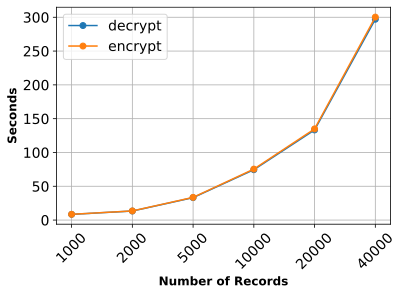

,1000,2000,5000,10000,20000,40000
0,2.444163,2.131868,7.074228,12.850318,22.427648,79.732033
1,2.468093,2.291832,7.359114,12.692936,20.218042,38.442413
2,1.287533,1.153721,7.054153,12.784229,20.197116,38.363017
3,1.238107,2.026395,6.946230,12.453865,21.758606,38.246469
4,1.218344,2.066046,7.710141,11.778513,22.269519,38.170107
5,1.240220,2.052927,7.655073,23.481757,22.166086,87.273188


1000      1.649410
2000      1.953798
5000      7.299823
10000    14.340270
20000    21.506170
40000    53.371205
dtype: float64


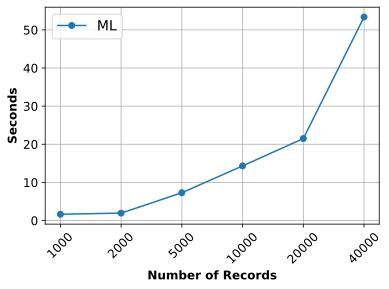

,1000,2000,5000,10000,20000,40000
0,17.402353,16.773869,42.137701,82.353252,159.667832,374.806058
1,15.369317,16.621573,41.444158,82.452929,156.874328,311.778082
2,9.022199,15.456267,41.897949,81.585687,158.151975,310.636791
3,8.966297,16.604025,41.112608,79.732017,156.145577,305.921446
4,8.625561,16.333844,41.840575,79.095465,156.747699,304.699796
5,8.849714,16.325730,41.834323,139.238060,155.886772,98.704528


1000      11.372573
2000      16.352551
5000      41.711219
10000     90.742902
20000    157.245697
40000    284.424450
dtype: float64


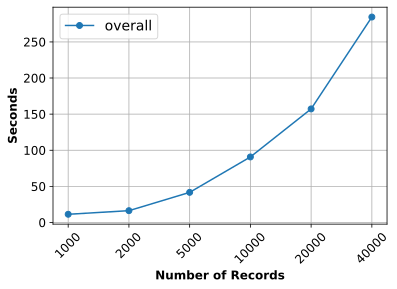

In [6]:
# df_decrypt=pd.read_csv("decrypt_benchmark.csv",names=["count","decrypt"])
# df_encrypt=pd.read_csv("encrypt_benchmark.csv",names=["count","encrypt"])
# df_ML=pd.read_csv("ML_benchmark.csv",names=["count","ML_time"])
# df_overall=pd.read_csv("overall_benchmark.csv",names=["count","overall_time"])

df_decrypt=fileArrange(df_decrypt,"decrypt")
df_decrypt
# df_decrypt.drop(5)
# df_decrypt
df_encrypt=fileArrange(df_encrypt,"encrypt")
df_encrypt
combined_benchmark(df_decrypt,df_encrypt,"decrypt","encrypt")

df_ML=fileArrange(df_ML,"ML_time")
df_ML
single_benchmark(df_ML,"ML")
    
df_overall=fileArrange(df_overall,"overall_time")
df_overall
single_benchmark(df_overall,"overall")